In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)  

### 1. 전체 현황

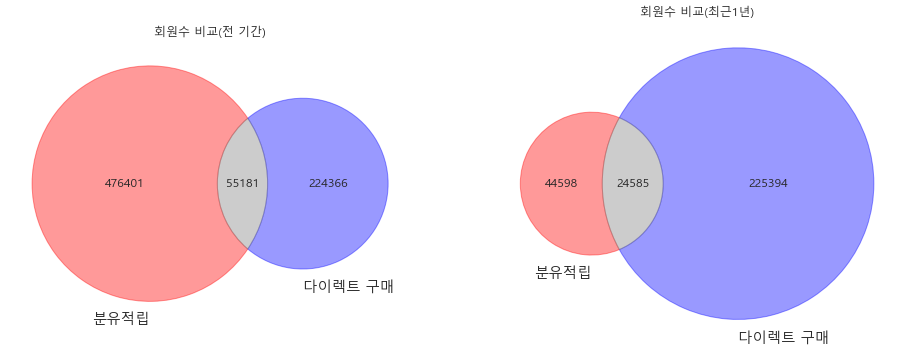

In [49]:
from matplotlib_venn import venn2

plt.figure(figsize=(16,6))
plt.subplot(1,2,1);plt.title('회원수 비교(전 기간)')
c= venn2(subsets = (476401, 224366, 55181), set_labels = ('분유적립', '다이렉트 구매'))
c.get_patch_by_id('10').set_color('red'); c.get_patch_by_id('01').set_color('blue'); c.get_patch_by_id('11').set_color('gray')

plt.subplot(1,2,2); plt.title('회원수 비교(최근1년)')
c= venn2(subsets = (44598, 225394, 24585), set_labels = ('분유적립', '다이렉트 구매'))
c.get_patch_by_id('10').set_color('red'); c.get_patch_by_id('01').set_color('blue'); c.get_patch_by_id('11').set_color('gray')


plt.show()

**Index**
- [분유적립$\cap$[다이렉트 구매] 비율은 최근 증가함(10.4% $\to$ 35.5%)

### 2. 자료추출 : 분유적립 & 다이렉트 구매 인원의 정보(최근1년 기준)

In [2]:
# version 2 : test1

import cx_Oracle as oci
import pandas as pd

# 접속정보
con_text = open("C:/conn_CRM.txt", 'r', encoding='utf8')
con_text = con_text.read()

# DB 접속
conn = oci.connect(con_text)

# query 열기
f = open("C:/Users/MAEIL/Google 드라이브/python/Data-Analysis(new)/2. EDA/query_direct_to_point.txt", 'r')
line = f.read()
f.close()

## query 실행( =자료 추출)
df = pd.read_sql(line, con = conn)


In [3]:
df.head(2)

,MEMBER_NO,FIRST_RESERVE,LAST_RESERVE,RESERVE_CAN,FIRST_BUY,LAST_BUY,FREQUENCY,MONETORY
0,398152,2019-06-11 09:02:26,2019-06-11 09:02:26,1.0,2018-12-19 11:14:27,2020-07-15 13:54:36,2040,155003100
1,731740,2019-05-14 21:11:00,2020-02-28 19:24:57,31.0,2019-11-06 12:50:35,2020-02-01 16:43:23,4,60800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33777 entries, 0 to 33776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MEMBER_NO      33777 non-null  int64         
 1   FIRST_RESERVE  33777 non-null  datetime64[ns]
 2   LAST_RESERVE   33777 non-null  datetime64[ns]
 3   RESERVE_CAN    33777 non-null  float64       
 4   FIRST_BUY      33777 non-null  datetime64[ns]
 5   LAST_BUY       33777 non-null  datetime64[ns]
 6   FREQUENCY      33777 non-null  int64         
 7   MONETORY       33777 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3)
memory usage: 2.1 MB


In [9]:
df.describe()

,MEMBER_NO,RESERVE_CAN,FREQUENCY,MONETORY
count,3.377700e+04,33777.000000,33777.000000,3.377700e+04
mean,4.705112e+06,28.780487,2.248631,4.849948e+04
std,8.764853e+05,21.900356,11.311243,8.455321e+05
min,3.981520e+05,0.500000,1.000000,5.000000e+02
25%,4.452058e+06,11.000000,1.000000,1.740000e+04
50%,4.976822e+06,26.000000,1.000000,2.430000e+04
75%,5.246433e+06,42.000000,2.000000,5.260000e+04
max,5.970670e+06,209.000000,2040.000000,1.550031e+08


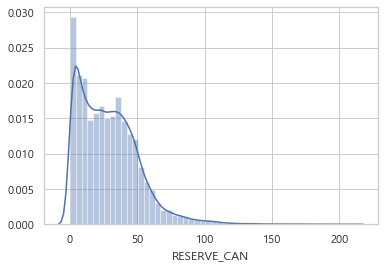

In [27]:
plt.figure(figsize=(10,6))
subplot(1,2,1); sns.distplot(df.RESERVE_CAN)
subplot(1,2,2); sns.distplot(df.RESERVE_CAN)
plt.show();

In [47]:
# sns.distplot(df.FREQUENCY); plt.show();